### Sentiment analysis:
 Vader (Varience aware Directionary and sentiment reasoner) --> Bag of words 


In [20]:
#Lets read in the data and NLTK basics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from  nltk import word_tokenize

In [2]:
#Read the data
df = pd.read_csv(r'C:\Users\manoj.n.d\Documents\Data Scientist work\Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [12]:
#The reviews written in the text attribute
df['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [4]:
df.shape

(568454, 10)

In [5]:
#Data is huge so lets take 1000 columns

new_df = df.head(1000)

In [6]:
new_df.shape

(1000, 10)

In [7]:
#Checking weather the data has any null value or not
new_df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

#### Quick EDA

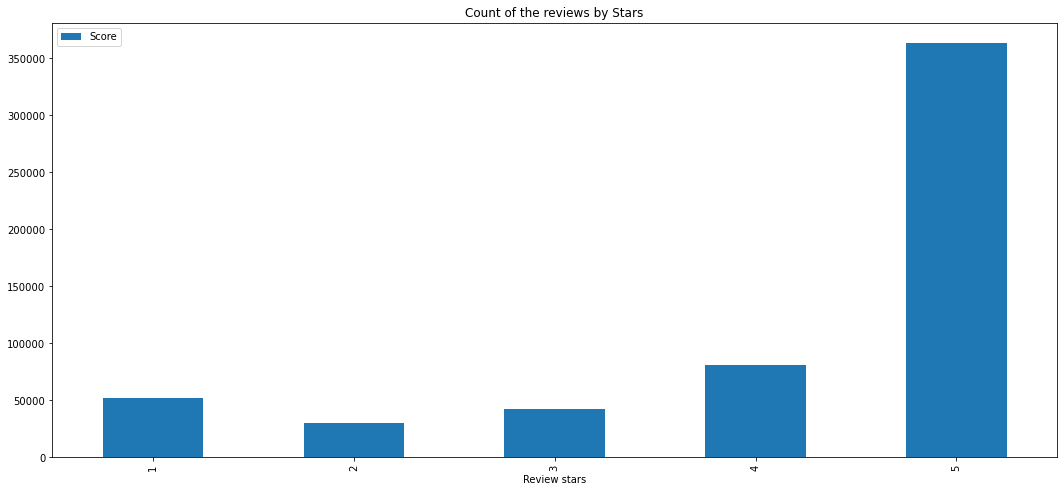

In [8]:
df['Score'].value_counts().sort_index().plot(kind='bar',title="Count of the reviews by Stars",figsize=(18,8))
plt.xlabel('Review stars')
plt.legend(loc=0)
plt.show()


In [15]:
#Basics NLTK

example = new_df['Text'][10]
print(example)

I don't know if it's the cactus or the tequila or just the unique combination of ingredients, but the flavour of this hot sauce makes it one of a kind!  We picked up a bottle once on a trip we were on and brought it back home with us and were totally blown away!  When we realized that we simply couldn't find it anywhere in our city we were bummed.<br /><br />Now, because of the magic of the internet, we have a case of the sauce and are ecstatic because of it.<br /><br />If you love hot sauce..I mean really love hot sauce, but don't want a sauce that tastelessly burns your throat, grab a bottle of Tequila Picante Gourmet de Inclan.  Just realize that once you taste it, you will never want to use any other sauce.<br /><br />Thank you for the personal, incredible service!


In [23]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['I', 'do', "n't", 'know', 'if', 'it', "'s", 'the', 'cactus', 'or']

In [26]:
nltk.pos_tag(tokens)

[('I', 'PRP'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('know', 'VB'),
 ('if', 'IN'),
 ('it', 'PRP'),
 ("'s", 'VBZ'),
 ('the', 'DT'),
 ('cactus', 'NN'),
 ('or', 'CC'),
 ('the', 'DT'),
 ('tequila', 'NN'),
 ('or', 'CC'),
 ('just', 'RB'),
 ('the', 'DT'),
 ('unique', 'JJ'),
 ('combination', 'NN'),
 ('of', 'IN'),
 ('ingredients', 'NNS'),
 (',', ','),
 ('but', 'CC'),
 ('the', 'DT'),
 ('flavour', 'NN'),
 ('of', 'IN'),
 ('this', 'DT'),
 ('hot', 'JJ'),
 ('sauce', 'NN'),
 ('makes', 'VBZ'),
 ('it', 'PRP'),
 ('one', 'CD'),
 ('of', 'IN'),
 ('a', 'DT'),
 ('kind', 'NN'),
 ('!', '.'),
 ('We', 'PRP'),
 ('picked', 'VBD'),
 ('up', 'RP'),
 ('a', 'DT'),
 ('bottle', 'NN'),
 ('once', 'RB'),
 ('on', 'IN'),
 ('a', 'DT'),
 ('trip', 'NN'),
 ('we', 'PRP'),
 ('were', 'VBD'),
 ('on', 'IN'),
 ('and', 'CC'),
 ('brought', 'VBD'),
 ('it', 'PRP'),
 ('back', 'RP'),
 ('home', 'NN'),
 ('with', 'IN'),
 ('us', 'PRP'),
 ('and', 'CC'),
 ('were', 'VBD'),
 ('totally', 'RB'),
 ('blown', 'VBN'),
 ('away', 'RB'),
 ('!', '.'),
 ('When', 'W

### VADER sentiment scoring
This uses a bag of words approach.
1. Stop words are removed.
2. Each word is scored and combined to a total score
 
 This apprach is not account for the relations in the speech

In [27]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sie = SentimentIntensityAnalyzer()

In [29]:
sie.polarity_scores('I am so happy!')
#Tagged as positive

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [30]:
sie.polarity_scores('This is the worst thing')
#Tagged as negative.

{'neg': 0.506, 'neu': 0.494, 'pos': 0.0, 'compound': -0.6249}

In [31]:
sie.polarity_scores(example)
#This is positive review`

{'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746}

In [33]:
##Run the polarity score of entire data set
new_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
995,996,B006F2NYI2,A1D3F6UI1RTXO0,Swopes,1,1,5,1331856000,Hot & Flavorful,BLACK MARKET HOT SAUCE IS WONDERFUL.... My hus...
996,997,B006F2NYI2,AF50D40Y85TV3,Mike A.,1,1,5,1328140800,Great Hot Sauce and people who run it!,"Man what can i say, this salsa is the bomb!! i..."
997,998,B006F2NYI2,A3G313KLWDG3PW,kefka82,1,1,5,1324252800,this sauce is the shiznit,this sauce is so good with just about anything...
998,999,B006F2NYI2,A3NIDDT7E7JIFW,V. B. Brookshaw,1,2,1,1336089600,Not Hot,Not hot at all. Like the other low star review...


In [45]:
#Run the polarity score on the entire dataset
res = {}
for i,row in tqdm(new_df.iterrows(), total=len(new_df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sie.polarity_scores(text)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [46]:
res

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [50]:
#Lets store this in the dataframe
vader = pd.DataFrame(res).T

In [53]:
vaders = vader.reset_index().rename(columns={'index':'Id'})

In [54]:
vaders = vaders.merge(new_df, how='left')

In [58]:
vaders.head(1)

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.0,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...


<AxesSubplot:xlabel='Score', ylabel='compound'>

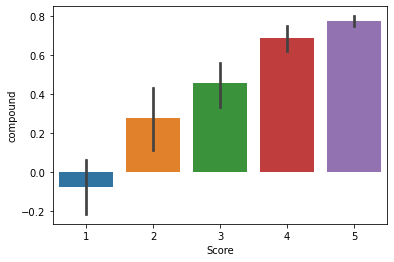

In [56]:
sns.barplot(data=vaders, x='Score', y='compound')
#Plotting the barplot wth score and compound

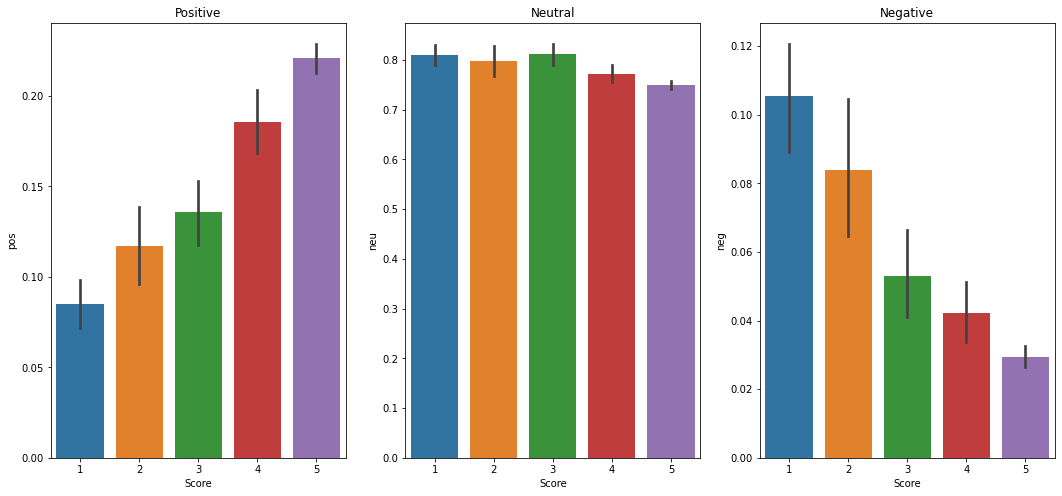

In [63]:
fig, ax = plt.subplots(1,3, figsize=(18,8))
sns.barplot(data=vaders,x='Score',y='pos', ax=ax[0])
sns.barplot(data=vaders,x='Score', y='neu', ax=ax[1])
sns.barplot(data=vaders,x='Score', y='neg', ax=ax[2])
ax[0].set_title('Positive')
ax[1].set_title('Neutral')
ax[2].set_title('Negative')
plt.show()